In [1]:
using Distributions 
using IntervalSets
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Random123
using HCubature
using HDF5

using KDTree
using BAT
# using BATPar

using LaTeXStrings

In [2]:
import PyPlot

plt = PyPlot

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc("text", usetex=true)

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);
# colors = vcat([0 0 0 0.1], plt.cm.Blues(range(0, stop=1, length=10))[3:end,:])

In [3]:
# prior = NamedTupleDist(a = [[1.0 .. 2.0 for i in 1:2]...],);
# outp = bat_read("../../MCMC_publication/Saved_samples/samples_2.hdf5")
# samples = varshape(prior).(outp);

In [4]:
g(x;) = 0.8*pdf.(Normal(-5,0.9), x)+1.2*pdf.(Normal(-1.0,0.4), x) + 0.8*pdf.(Normal(1.0,0.4), x) + 0.8*pdf.(Normal(5,0.9), x) # 2

likelihood = params -> LogDVal((log(g(params.a))))
prior = NamedTupleDist(a = -10. .. 10.);
posterior = PosteriorDensity(likelihood, prior);

samples, stats_tmp = bat_sample(posterior, (1000, 10), MetropolisHastings());

┌ Info: Initializing new RNG of type Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 10 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 10 chains, 2 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 10 chains, 10 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC tuning of 10 chains successful after 2 cycle(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:102


In [5]:
KDTree.evaluate_total_cost(data::Data) = KDTree.cost_f_1(data)

In [6]:
smpl = flatview(unshaped.(samples.v))
weights_LogLik = samples.logd
weights_Histogram = samples.weight;

data_kdtree = Data(smpl[:,1:5:end], weights_Histogram[1:5:end], weights_LogLik[1:5:end]);

In [7]:
cost_1 = KDTree.evaluate_total_cost(data_kdtree)
output_1 = KDTree.find_min_along_axis(data_kdtree, 1)

([-8.271304648582863, -7.934337763356851, -7.597370878130839, -7.260403992904827, -6.923437107678816, -6.586470222452804, -6.249503337226792, -5.91253645200078, -5.575569566774768, -5.238602681548756  …  5.207370760457608, 5.54433764568362, 5.881304530909632, 6.218271416135644, 6.555238301361656, 6.892205186587668, 7.229172071813679, 7.566138957039691, 7.903105842265703, 8.240072727491714], Any[Inf, Inf, 2.505951547659314e8, 2.482319364346149e8, 2.4459166400410244e8, 2.3405624842282015e8, 2.2338010096406925e8, 2.118024284144432e8, 1.912483567279723e8, 1.6624255072962305e8  …  1.5127309584696755e8, 1.7587114499838147e8, 1.989607394575715e8, 2.2108548790940115e8, 2.3352597370859164e8, 2.4265755269067705e8, 2.5138151119006646e8, Inf, Inf, Inf], 0.15286748206743175, 4.2302050402178586e7)

In [8]:
data_kdtree_2 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .> output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .> output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .> output_1[3]]);
data_kdtree_3 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .< output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .< output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .< output_1[3]]);

In [9]:
cost_2 = KDTree.evaluate_total_cost(data_kdtree_2)
cost_3 = KDTree.evaluate_total_cost(data_kdtree_3)

output_2 = KDTree.find_min_along_axis(data_kdtree_2, 1)
output_3 = KDTree.find_min_along_axis(data_kdtree_3, 1)

([-8.271304648582863, -8.099394134360029, -7.9274836201371945, -7.755573105914361, -7.583662591691526, -7.411752077468693, -7.239841563245858, -7.0679310490230245, -6.896020534800191, -6.724110020577356  …  -1.3948840796695015, -1.2229735654466674, -1.0510630512238333, -0.8791525370009993, -0.7072420227781653, -0.5353315085553312, -0.3634209943324972, -0.19151048010966312, -0.019599965886829097, 0.15231054833600494], Any[Inf, Inf, Inf, 2.49835359868138e7, 2.485390434582837e7, 2.485390434582837e7, 2.4377515745292306e7, 2.4266616846732613e7, 2.3547910464969818e7, 2.2321035772036508e7  …  3.649822226628077e6, 5.644220540836546e6, 8.804338140650813e6, 1.2491324072942106e7, 1.6110979259006968e7, 1.9204699138560735e7, 2.165857238135804e7, 2.4039857832172997e7, 2.4939813561117113e7, Inf], -2.770168193452174, 1.4513873418703198e6)

In [10]:
data_kdtree_4 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .> output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .> output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .> output_3[3]]);
data_kdtree_5 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .< output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .< output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .< output_3[3]]);

In [11]:
cost_4 = KDTree.evaluate_total_cost(data_kdtree_4)
cost_5 = KDTree.evaluate_total_cost(data_kdtree_5)

output_4 = KDTree.find_min_along_axis(data_kdtree_4, 1)
output_5 = KDTree.find_min_along_axis(data_kdtree_5, 1)

([-8.271304648582863, -8.159059163920533, -8.046813679258202, -7.934568194595872, -7.822322709933543, -7.710077225271212, -7.597831740608882, -7.4855862559465525, -7.373340771284222, -7.261095286621892  …  -3.7814852620896597, -3.6692397774273298, -3.556994292765, -3.4447488081026694, -3.3325033234403394, -3.2202578387780094, -3.1080123541156794, -2.995766869453349, -2.883521384791019, -2.771275900128689], Any[Inf, Inf, Inf, Inf, 895279.8613110692, 895279.8613110692, 881432.9056116818, 881432.9056116818, 855136.4160466007, 832060.1006671094  …  641502.7067814415, 694641.449724266, 745218.3978660282, 795605.143509911, 833038.5457763853, 857834.6389528658, 872487.7343064522, 925529.5500371181, Inf, Inf], -5.01618559337529, 168731.24183261883)

In [12]:
cost_array = [cost_1, output_1[4], output_3[4]+cost_2, output_2[4]+cost_5+cost_4]
cut_range = 0:1:3

0:1:3

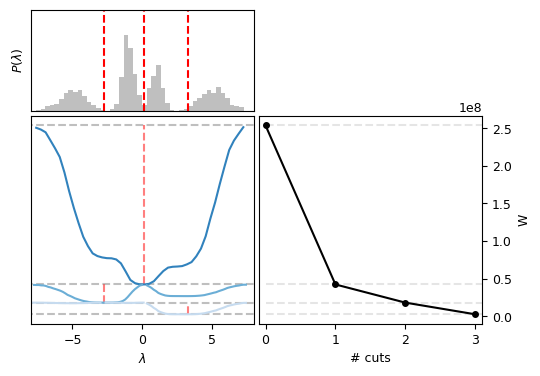

(0.0, 1300.0)

In [23]:
fig = plt.figure(figsize=(5.826767123287671, 4.07873698630137),)

fig.subplots_adjust(hspace=0.05, wspace=0.02)

ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1, yticklabels=[],  yticks=[], )
ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  )

ax2.hist(data_kdtree.samples[1,:], weights=data_kdtree.weights, bins=50, color="gray", alpha=0.5, label="Density");
ax2.vlines(output_1[3], 0, 1700, color="red", ls="--", label="Cut position")
ax2.vlines(output_3[3], 0, 1700, color="red", ls="--")
ax2.vlines(output_2[3], 0, 1700, color="red", ls="--")
ax2.get_xaxis().set_visible(false) 
# ax2.legend(loc="upper left", frameon=true, framealpha=0.9, ncol=1)
ax2.set_ylabel(L"P(\lambda)")

# ax1.plot(output_1[1], output_1[2], color="steelblue") #dodgerblue skyblue lightskyblue lightblue
# ax1.plot(output_2[1], cost_3 .+ output_2[2], color="lightskyblue")
# ax1.plot(output_3[1], cost_2 .+ output_3[2], color="lightskyblue")
# ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color="lightblue")
# ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color="lightblue")
# ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color="lightblue")

ax1.plot(output_1[1], output_1[2], color=PyPlot.ColorMap("tab20c").colors[1]) #dodgerblue skyblue lightskyblue lightblue
ax1.plot(output_2[1], cost_3 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_3[1], cost_2 .+ output_3[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[4])

ax1.hlines(output_3[4]+cost_2, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(output_2[4]+cost_5+cost_4, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(cost_1, -10,10, color="gray", ls="--", alpha=0.5 )
ax1.hlines(output_1[4], -10,10, color="gray", ls="--", alpha=0.5)

ax1.vlines(output_1[3], output_1[4], cost_1, color="red", alpha=0.5, ls="--")
ax1.vlines(output_3[3], output_3[4]+cost_2, output_1[4], color="red", alpha=0.5, ls="--")
ax1.vlines(output_2[3], output_2[4]+cost_5+cost_4, output_3[4]+cost_2, color="red", alpha=0.5, ls="--")
# ax2.vlines(output_3[3], 0, 700, color="red")
# ax2.vlines(output_2[3], 0, 700, color="red")

ax1.set_xlabel(L"\lambda")

ax3.plot(collect(cut_range), cost_array, color="black", "-o", ms=4, mfc="k")
ax3.yaxis.tick_right()
ax3.yaxis.set_ticks_position("right")
ax3.set_xlabel("# cuts")
ax3.set_ylabel("W")
ax3.yaxis.set_label_position("right")

ax3.hlines(output_3[4]+cost_2, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_2[4]+cost_5+cost_4, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(cost_1, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_1[4], 0,4, color="gray", ls="--", alpha=0.2)
ax3.set_xticks(collect(cut_range))
ax3.set_xlim(-0.1, 3.1)

ax2.set_xlim(-8., 8.)
ax1.set_xlim(-8., 8.)

ax2.set_ylim(0.0, 1300.)

# fig.savefig("../plots/fig-b.pdf", bbox_inches = "tight")